<a href="https://colab.research.google.com/github/hongqin/Python-CoLab-bootcamp/blob/master/DPGR_mixed_pop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

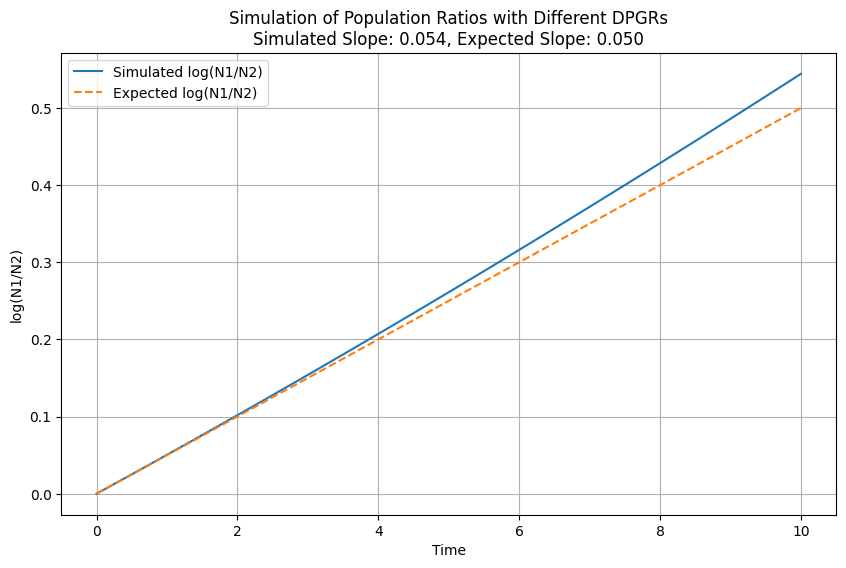

(0.05444662890345368, 0.05)

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
dpgr_1a_2a = 0.02
dpgr_1b_2b = 0.08
g2a = 1.0
g2b = 1.0
g1a = g2a + dpgr_1a_2a
g1b = g2b + dpgr_1b_2b

initial_N1a = 100
initial_N1b = 100
initial_N2a = 100
initial_N2b = 100
time_points = np.linspace(0, 10, 100)  # Simulate over 10 time units

# Define population growth functions
def population_growth(N0, g, t):
    return N0 * np.exp(g * t)

# Initialize arrays to store results
N1a = np.zeros_like(time_points)
N1b = np.zeros_like(time_points)
N2a = np.zeros_like(time_points)
N2b = np.zeros_like(time_points)
N1 = np.zeros_like(time_points)
N2 = np.zeros_like(time_points)
log_ratio_N1_N2 = np.zeros_like(time_points)
expected_log_ratio_N1_N2 = np.zeros_like(time_points)

# Simulate population growth
for i, t in enumerate(time_points):
    N1a[i] = population_growth(initial_N1a, g1a, t)
    N1b[i] = population_growth(initial_N1b, g1b, t)
    N2a[i] = population_growth(initial_N2a, g2a, t)
    N2b[i] = population_growth(initial_N2b, g2b, t)
    N1[i] = N1a[i] + N1b[i]
    N2[i] = N2a[i] + N2b[i]
    log_ratio_N1_N2[i] = np.log(N1[i] / N2[i])
    expected_log_ratio_N1_N2[i] = (0.5 * dpgr_1a_2a + 0.5 * dpgr_1b_2b) * t

# Calculate slopes
simulated_slope, _ = np.polyfit(time_points, log_ratio_N1_N2, 1)
expected_slope = 0.5 * dpgr_1a_2a + 0.5 * dpgr_1b_2b

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(time_points, log_ratio_N1_N2, label='Simulated log(N1/N2)')
plt.plot(time_points, expected_log_ratio_N1_N2, label='Expected log(N1/N2)', linestyle='--')
plt.xlabel('Time')
plt.ylabel('log(N1/N2)')
plt.title(f'Simulation of Population Ratios with Different DPGRs\nSimulated Slope: {simulated_slope:.3f}, Expected Slope: {expected_slope:.3f}')
plt.legend()
plt.grid(True)
plt.show()

simulated_slope, expected_slope